In [1]:
!pip install opencv-python

Saving park.jpg to park (2).jpg


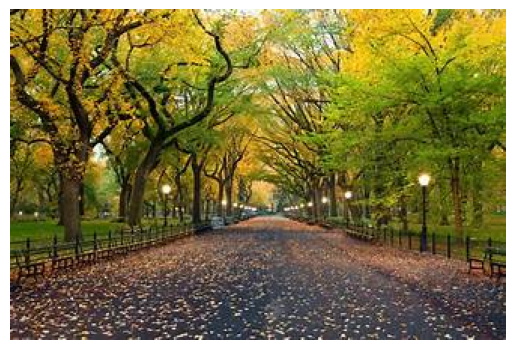

In [10]:
from google.colab import files
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Read the image from the uploaded file
for file_name in uploaded.keys():
    # Convert the file to a numpy array and decode it as an image
    image = np.frombuffer(uploaded[file_name], np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # Step 3: Convert and display the image using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.show()


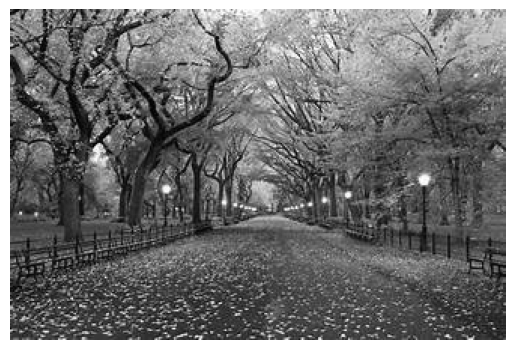

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')  # Hide axis
plt.imshow(gray, cmap='gray')

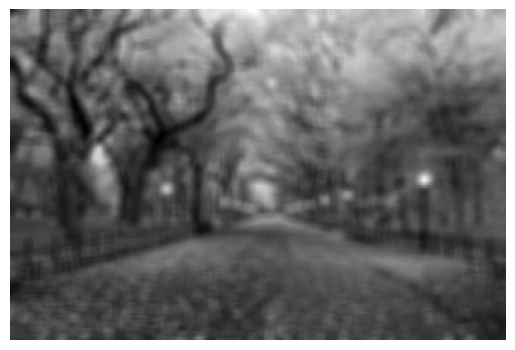

In [17]:
blur = cv2.GaussianBlur(gray, (7,7),cv2.BORDER_DEFAULT)
plt.axis('off')  # Hide axis
plt.imshow(blur, cmap='gray')

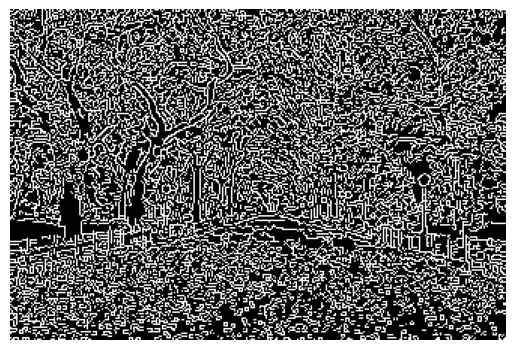

In [24]:
#edge cascade
canny = cv2.Canny(gray, 75, 150)
plt.axis('off')  # Hide axis
plt.imshow(canny, cmap='gray')


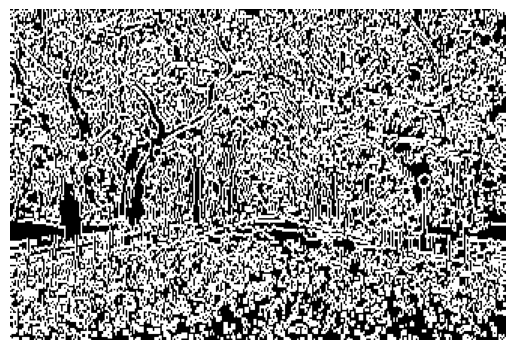

In [28]:
#dilation
dilated = cv2.dilate(canny, (3,3))
plt.axis('off')  # Hide axis
plt.imshow(dilated, cmap='gray')

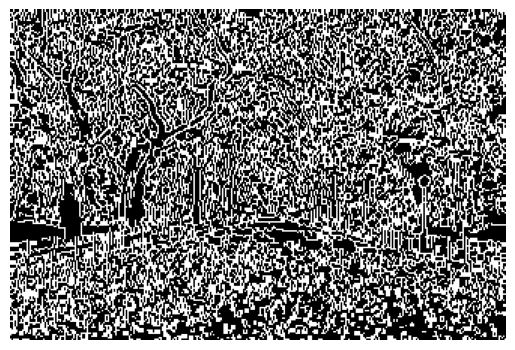

In [29]:
#erode
eroded = cv2.erode(dilated, (3,3))
plt.axis('off')  # Hide axis
plt.imshow(eroded, cmap='gray')

In [31]:
img.shape

(220, 330, 3)

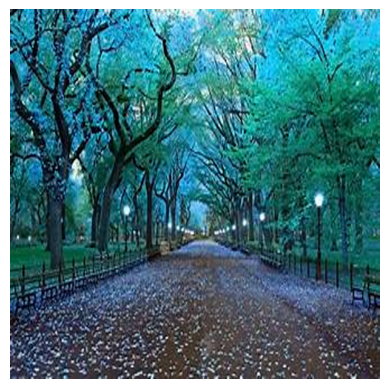

In [32]:
#resize
resized = cv2.resize(img, (500,500), interpolation=cv2.INTER_CUBIC)
plt.axis('off')  # Hide axis
plt.imshow(resized)

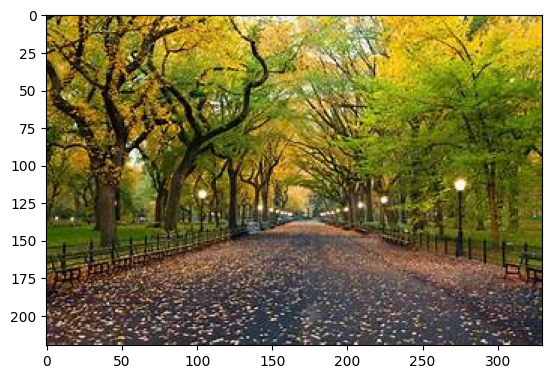

In [34]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

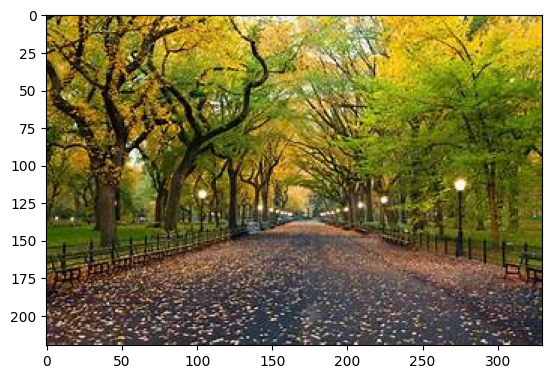

In [35]:
plt.imshow(img)

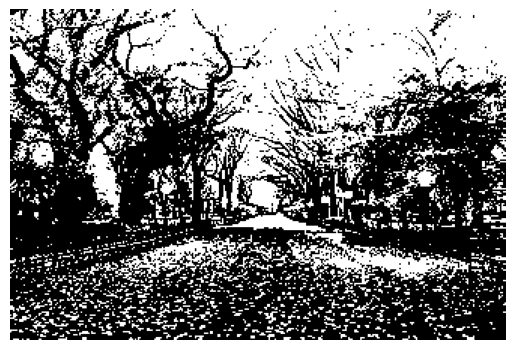

In [40]:
#threshold
ret, thresh = cv2.threshold(gray, 100, 200, cv2.THRESH_BINARY)
plt.axis('off')  # Hide axis
plt.imshow(thresh, cmap='gray')

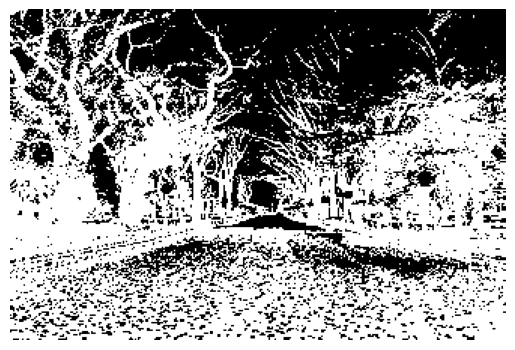

In [42]:
#threshold extract object
ret, thresh_inv = cv2.threshold(gray, 100, 200, cv2.THRESH_BINARY_INV)
plt.axis('off')  # Hide axis
plt.imshow(thresh_inv, cmap='gray')

In [48]:
#adaptive threshold
adaptive_thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

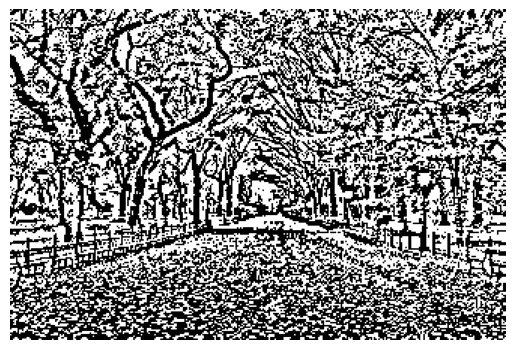

In [49]:
plt.axis('off')  # Hide axis
plt.imshow(adaptive_thresh1, cmap='gray')

In [60]:
#adaptive threshold
adaptive_thresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)

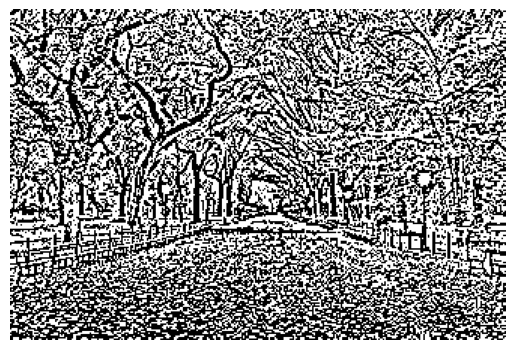

In [61]:
plt.axis('off')  # Hide axis
plt.imshow(adaptive_thresh2, cmap='gray')

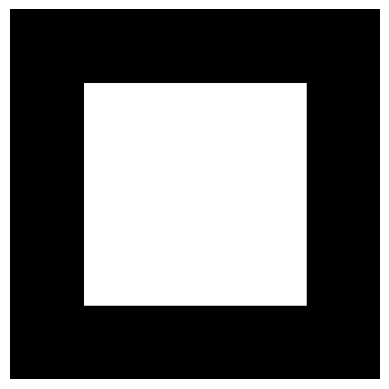

In [77]:
blank = np.zeros((500, 500, 3), dtype='uint8')

cv2.rectangle(blank, (100, 100), (400, 400), (255, 255, 255), thickness=-1)

plt.imshow(blank)
plt.axis('off')  # Hide axis
plt.show()


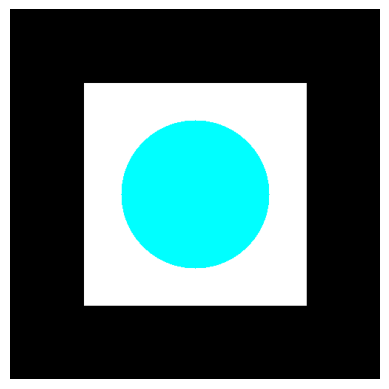

In [79]:
cv2.circle(blank, (250, 250), 100, (0, 255, 255), thickness=-1)

plt.imshow(blank)
plt.axis('off')  # Hide axis
plt.show()


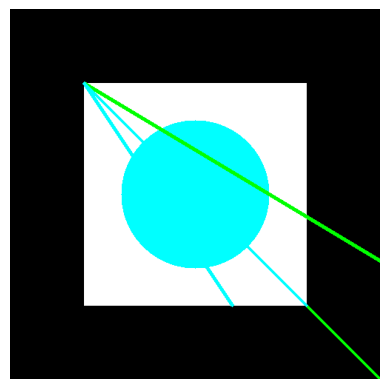

In [90]:
cv2.line(blank, (100, 100), (300, 400), (0, 255, 255), thickness=3)

plt.imshow(blank)
plt.axis('off')  # Hide axis
plt.show()

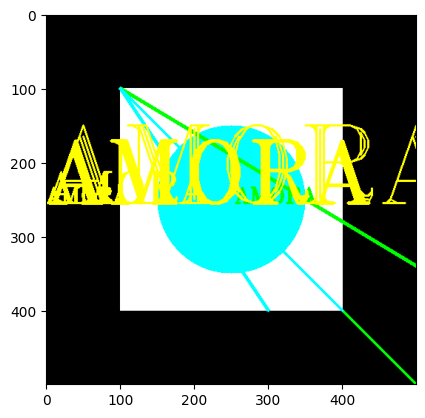

In [99]:
cv2.putText(blank, 'AMORA', (0, 255), cv2.FONT_HERSHEY_TRIPLEX, 4, (255, 255, 0), 4)

plt.imshow(blank)

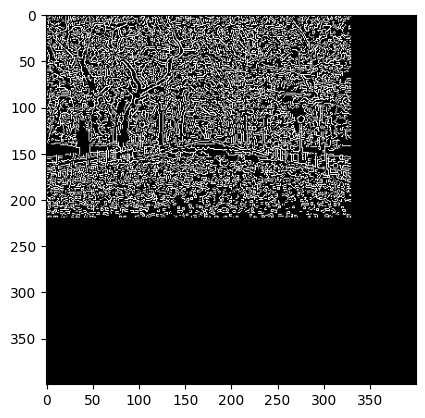

In [107]:
contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
blank = np.zeros((400,400,3), dtype='uint8')
cv2.drawContours(blank, contours, -1, (255, 255, 255), -1)
plt.imshow(blank)